## FAKE NEWS DETECTION

### Importing Librabies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import re
import string

### Importing the Dataset

In [22]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

### Inserting "Class" as target attribute

In [23]:
df_fake["class"] = 0
df_true["class"] = 1

### Manual testing data

In [24]:
df_fake_manual_testing = df_fake.tail(10)
df_true_manual_testing = df_true.tail(10)

### Removing manual testing data from the main dataframes

In [25]:
df_true = df_true.iloc[:-10]
df_fake = df_fake.iloc[:-10]

### Assigning class labels

In [26]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

### Concatenating manual testing data

In [29]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

### Merging True and Fake datasets

In [28]:
df_merge = pd.concat([df_fake, df_true], axis=0)

### Dropping unnecessary columns

In [30]:
df = df_merge.drop(["title", "subject", "date"], axis=1)

### Shuffling the dataframe

In [31]:
df = df.sample(frac=1).reset_index(drop=True)

### Preprocessing text data

In [34]:
def process_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df["text"] = df["text"].apply(process_text)

### Defining dependent and independent variables

In [33]:
x = df["text"]
y = df["class"]

### Splitting Training and Testing data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Vectorizing text data

In [36]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5894
           1       0.98      0.99      0.98      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



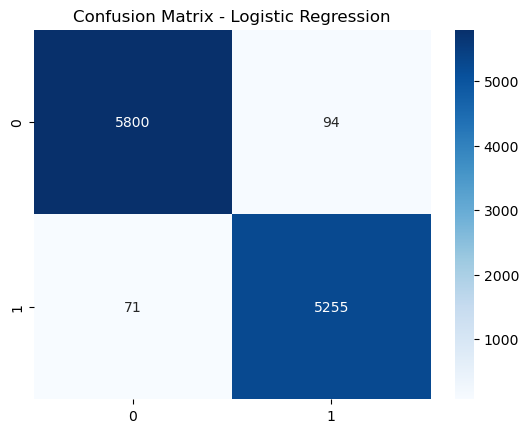

In [47]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
print("Logistic Regression Results:")
print(classification_report(y_test, pred_lr))
conf_matrix_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. Decision Tree Classification

Decision Tree Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5894
           1       1.00      0.99      1.00      5326

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



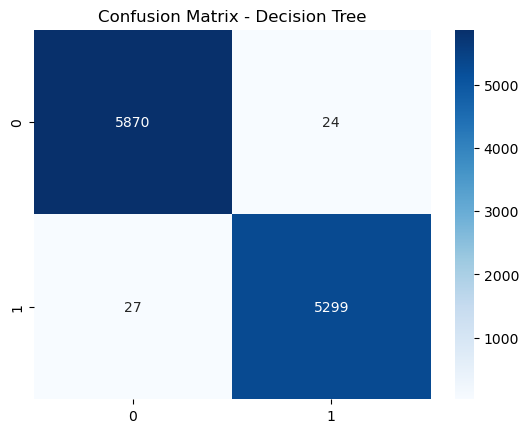

In [46]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
print("Decision Tree Classification Results:")
print(classification_report(y_test, pred_dt))
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 3. Gradient Boosting Classifier

Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5894
           1       0.99      1.00      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



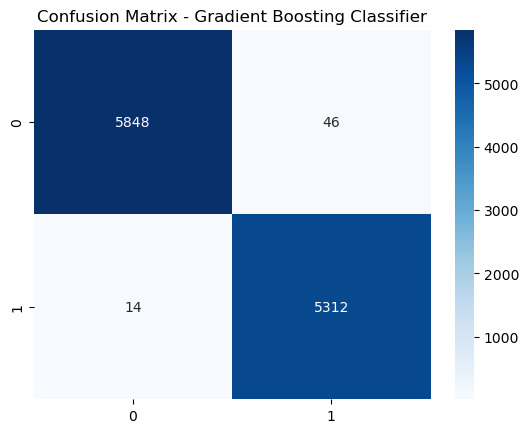

In [45]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
print("Gradient Boosting Classifier Results:")
print(classification_report(y_test, pred_gbc))
conf_matrix_gbc = confusion_matrix(y_test, pred_gbc)
sns.heatmap(conf_matrix_gbc, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

### 4. Random Forest Classifier

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



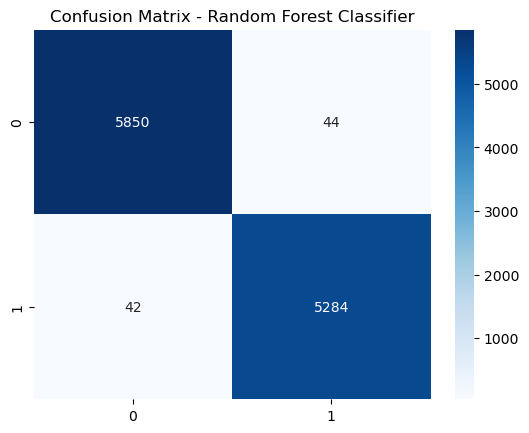

In [44]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
print("Random Forest Classifier Results:")
print(classification_report(y_test, pred_rfc))
conf_matrix_rfc = confusion_matrix(y_test, pred_rfc)
sns.heatmap(conf_matrix_rfc, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

### Function to output label

In [41]:
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

### Manual testing function

In [42]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(process_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    print("\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_GBC[0]),
        output_label(pred_RFC[0])
    ))

### Taking input for manual testing

In [43]:
news = str(input("Enter news for manual testing: "))
manual_testing(news)

Enter news for manual testing:  tcjvb'



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
